In [616]:
import pandas as pd
import numpy as np
import seaborn as sns

# Loading datasets
train=pd.read_csv('churnTest.csv')
test=pd.read_csv('churnTrain.csv')

# Checking for number of data
print("Number of records in train dataset:",train.shape)
print("number of records in test dataset:",test.shape)

Number of records in train dataset: (3333, 21)
number of records in test dataset: (425, 20)


In [617]:
train.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [618]:
test.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0
2,OH,103.0,408.0,4119481,no,yes,29,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1
3,NM,99.0,415.0,4189100,no,no,0,216.8,123.0,36.86,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1
4,SC,108.0,415.0,4133643,no,no,0,197.4,78.0,33.56,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2


In [619]:
train.info() #details about train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                3333 non-null   object 
 1   Account_Length       3333 non-null   int64  
 2   Area_Code            3333 non-null   int64  
 3   Phone_No             3333 non-null   int64  
 4   International_Plan   3333 non-null   object 
 5   Voice_Mail_Plan      3333 non-null   object 
 6   No_Vmail_Messages    3333 non-null   int64  
 7   Total_Day_minutes    3333 non-null   float64
 8   Total_Day_Calls      3333 non-null   int64  
 9   Total_Day_charge     3333 non-null   float64
 10  Total_Eve_Minutes    3333 non-null   float64
 11  Total_Eve_Calls      3333 non-null   int64  
 12  Total_Eve_Charge     3333 non-null   float64
 13  Total_Night_Minutes  3333 non-null   float64
 14  Total_Night_Calls    3333 non-null   int64  
 15  Total_Night_Charge   3333 non-null   f

In [620]:
test.info() #details about test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                425 non-null    object 
 1   Account_Length       424 non-null    float64
 2   Area_Code            424 non-null    float64
 3   Phone_No             425 non-null    int64  
 4   International_Plan   420 non-null    object 
 5   Voice_Mail_Plan      421 non-null    object 
 6   No_Vmail_Messages    425 non-null    int64  
 7   Total_Day_minutes    418 non-null    float64
 8   Total_Day_Calls      421 non-null    float64
 9   Total_Day_charge     414 non-null    float64
 10  Total_Eve_Minutes    414 non-null    float64
 11  Total_Eve_Calls      421 non-null    float64
 12  Total_Eve_Charge     420 non-null    float64
 13  Total_Night_Minutes  414 non-null    float64
 14  Total_Night_Calls    419 non-null    float64
 15  Total_Night_Charge   421 non-null    flo

In [621]:
# Data exploration:
train.isnull().sum()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

In [622]:
test.isnull().sum()

State                   0
Account_Length          1
Area_Code               1
Phone_No                0
International_Plan      5
Voice_Mail_Plan         4
No_Vmail_Messages       0
Total_Day_minutes       7
Total_Day_Calls         4
Total_Day_charge       11
Total_Eve_Minutes      11
Total_Eve_Calls         4
Total_Eve_Charge        5
Total_Night_Minutes    11
Total_Night_Calls       6
Total_Night_Charge      4
Total_Intl_Minutes      3
Total_Intl_Calls        5
Total_Intl_Charge       0
No_CS_Calls             0
dtype: int64

In [623]:
# Converting categorical variables into numerical variables

In [624]:
print("Train Dataset Categories")
train_cat=train.select_dtypes(exclude=("number","bool_","float_"))
train_cat.head()

Train Dataset Categories


,State,International_Plan,Voice_Mail_Plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


In [625]:
print("Train Dataset Numbers")
train_num=train.select_dtypes(exclude=("bool_","object_"))
train_num.head()

Train Dataset Numbers


,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,128,415,3824657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,3717191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,3581921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,3759999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,3306626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [626]:
# Calculating absolute churn correlation between numeric features
train_numeric = train.select_dtypes(include=[np.number])
corr_abs = train_numeric.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
       .stack()
       .sort_values(ascending=False))

print(sol)

Total_Day_minutes    Total_Day_charge      1.000000
Total_Eve_Minutes    Total_Eve_Charge      1.000000
Total_Night_Minutes  Total_Night_Charge    0.999999
Total_Intl_Minutes   Total_Intl_Charge     0.999993
Account_Length       Total_Day_Calls       0.038470
                                             ...   
Total_Eve_Calls      Total_Night_Charge    0.002056
Area_Code            No_Vmail_Messages     0.001994
No_Vmail_Messages    Total_Day_minutes     0.000778
                     Total_Day_charge      0.000776
Total_Night_Calls    Total_Intl_Calls      0.000305
Length: 136, dtype: float64


In [627]:
# Dropping columns that are highly correlated to their corresponding minute columns - done since they dont provide any new information
# also dropping Phone_No since they dont provide any info
train.drop(['Total_Day_charge', 'Total_Eve_Charge', 'Total_Night_Charge', 'Total_Intl_Charge', 'Phone_No'],
           axis=1, inplace=True)

test.drop(['Total_Day_charge', 'Total_Eve_Charge', 'Total_Night_Charge', 'Total_Intl_Charge', 'Phone_No'], 
          axis=1, inplace=True)

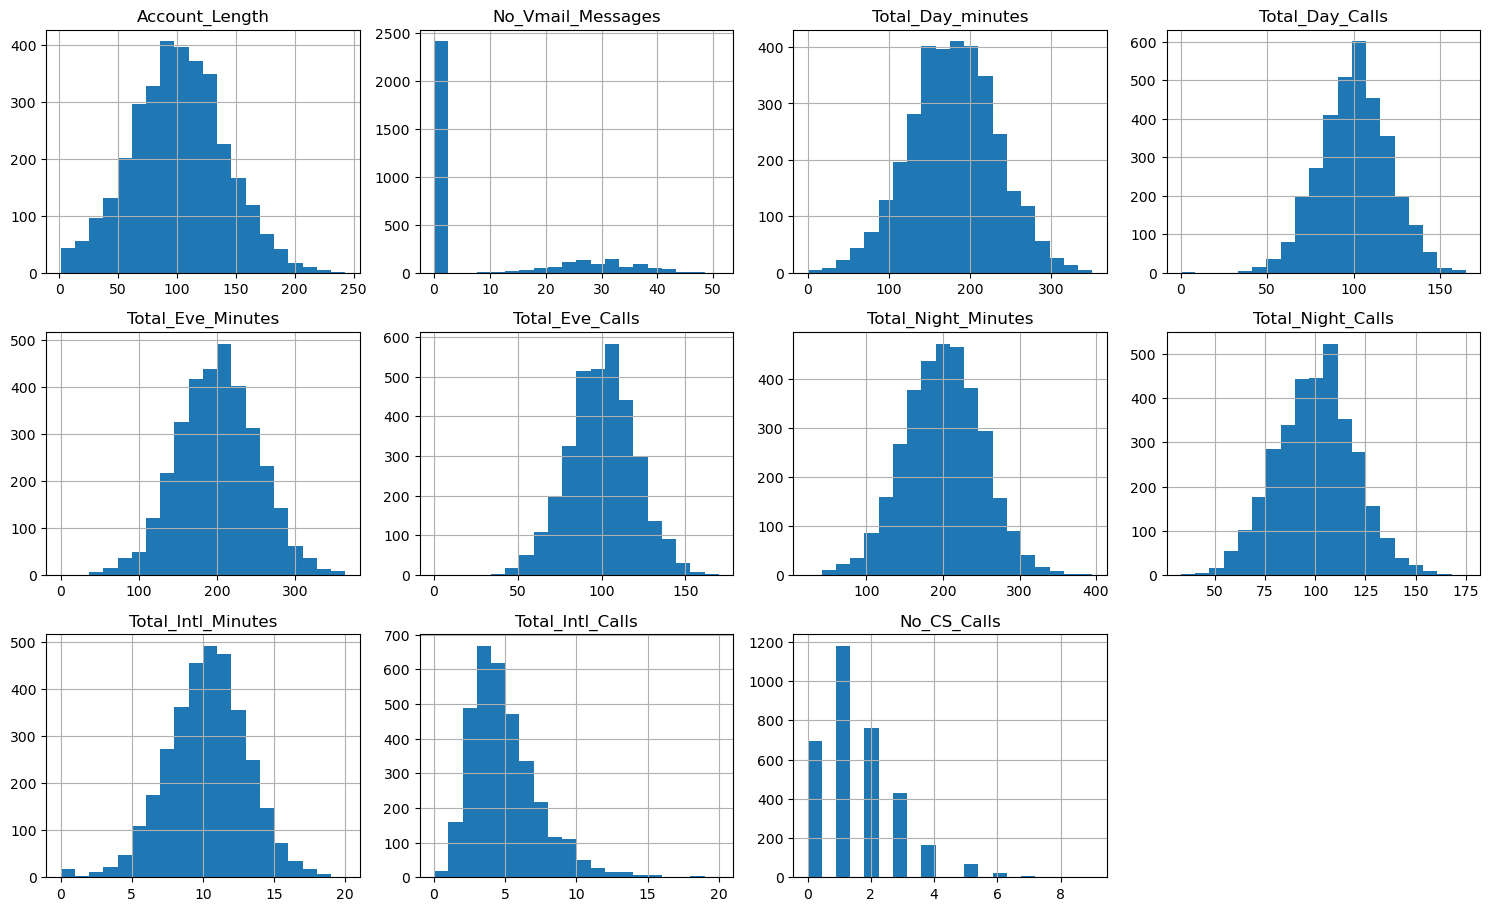

In [628]:
import matplotlib.pyplot as plt

# Selecting numeric columns, excluding 'Area_Code' since it not a numerical ploting data information
numeric_columns = train.select_dtypes(include=[np.number]).drop(columns=['Area_Code'])

# Plot the histograms
numeric_columns.hist(figsize=(15, 12), bins=20, layout=(4, 4))  # Adjusted figure size and layout
plt.tight_layout()  # Adjusts subplots to fit nicely
plt.show()

D:\Python stuff\Ana\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


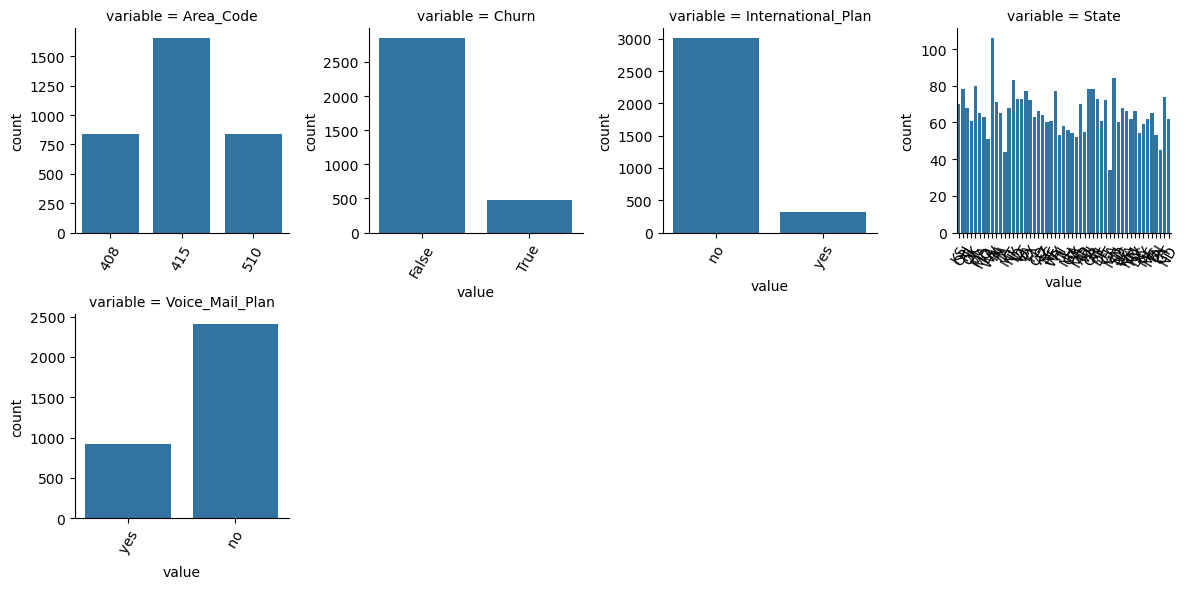

In [629]:
train_cat = ['Area_Code', 'Churn','International_Plan', 'State','Voice_Mail_Plan'] 

# Melt the DataFrame including the categorical columns
f = pd.melt(train, value_vars=sorted(train_cat))

# Create a FacetGrid for multiple subplots
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)

# Map a countplot onto the grid for each subplot
g.map(sns.countplot, 'value')

# Rotate x-axis tick labels for all axes in the grid
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=60)

# Adjust layout to fit plots nicely
g.fig.tight_layout()

# Show the plot
plt.show()

In [630]:
# From the above we can note that 
# - area code 415 is more
# - customeres who have churned has a hive response of not churn 
# - many dont have international plan
# - the states show that it is equally balanced but no new information
# - many do not own a voice mail plan
# Hence we can say that this is biased skewed dataset which needs to be fixed before feeding into ml algo to not give a biased/inaccurate responce

In [631]:
# Converting categorical data into numerical through sklearn by using label encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

train['State'] = label_encoder.fit_transform(train['State'])
train['International_Plan'] = label_encoder.fit_transform(train['International_Plan'])
train['Voice_Mail_Plan'] = label_encoder.fit_transform(train['Voice_Mail_Plan'])
train['Area_Code'] = label_encoder.fit_transform(train['Area_Code'])

print(train.dtypes)

State                    int32
Account_Length           int64
Area_Code                int64
International_Plan       int32
Voice_Mail_Plan          int32
No_Vmail_Messages        int64
Total_Day_minutes      float64
Total_Day_Calls          int64
Total_Eve_Minutes      float64
Total_Eve_Calls          int64
Total_Night_Minutes    float64
Total_Night_Calls        int64
Total_Intl_Minutes     float64
Total_Intl_Calls         int64
No_CS_Calls              int64
Churn                     bool
dtype: object


In [632]:
# Converting bool dataset of 'Churn' to numerical dataset
y=train["Churn"]

# Option 2: Opt-in to the future behavior
pd.set_option('future.no_silent_downcasting', True)
y=y.replace({True: 1, False: 0})
# Preparing data into numerical features (data matrix)
x=train.loc[:,train.columns!='Chrun']
print(x.shape)
x.head()

(3333, 16)


,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Eve_Minutes,Total_Eve_Calls,Total_Night_Minutes,Total_Night_Calls,Total_Intl_Minutes,Total_Intl_Calls,No_CS_Calls,Churn
0,16,128,1,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,1,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,35,84,0,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,36,75,1,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [633]:
print(train.dtypes)

State                    int32
Account_Length           int64
Area_Code                int64
International_Plan       int32
Voice_Mail_Plan          int32
No_Vmail_Messages        int64
Total_Day_minutes      float64
Total_Day_Calls          int64
Total_Eve_Minutes      float64
Total_Eve_Calls          int64
Total_Night_Minutes    float64
Total_Night_Calls        int64
Total_Intl_Minutes     float64
Total_Intl_Calls         int64
No_CS_Calls              int64
Churn                     bool
dtype: object


In [634]:
# Performing other EDAs (Exploratory Data Analysis)

In [635]:
# Performing Descriptive Statistics
# Summary statistics for numerical features
print("\nTraining Data Summary Statistics:")
print(train.describe())


Training Data Summary Statistics:
             State  Account_Length    Area_Code  International_Plan  \
count  3333.000000     3333.000000  3333.000000         3333.000000   
mean     26.059406      101.064806     1.000600            0.096910   
std      14.824911       39.822106     0.709649            0.295879   
min       0.000000        1.000000     0.000000            0.000000   
25%      14.000000       74.000000     0.000000            0.000000   
50%      26.000000      101.000000     1.000000            0.000000   
75%      39.000000      127.000000     2.000000            0.000000   
max      50.000000      243.000000     2.000000            1.000000   

       Voice_Mail_Plan  No_Vmail_Messages  Total_Day_minutes  Total_Day_Calls  \
count      3333.000000        3333.000000        3333.000000      3333.000000   
mean          0.276628           8.099010         179.775098       100.435644   
std           0.447398          13.688365          54.467389        20.069084   
m

In [636]:
print("\nTesting Data Summary Statistics:")
print(test.describe())


Testing Data Summary Statistics:
       Account_Length   Area_Code  No_Vmail_Messages  Total_Day_minutes  \
count      424.000000  424.000000         425.000000         418.000000   
mean       100.436321  438.509434           7.454118         181.950478   
std         37.456934   42.973464          13.604709          55.898633   
min          3.000000  408.000000           0.000000          41.200000   
25%         75.000000  415.000000           0.000000         143.825000   
50%         98.000000  415.000000           0.000000         179.650000   
75%        127.000000  510.000000           0.000000         217.850000   
max        194.000000  510.000000          49.000000         338.400000   

       Total_Day_Calls  Total_Eve_Minutes  Total_Eve_Calls  \
count       421.000000         414.000000       421.000000   
mean         99.980998         199.249275       100.679335   
std          19.242553          48.882010        18.911178   
min          48.000000          22.300000 

In [637]:
# Frequency counts for categorical variables (if any)
print("\nCategorical variables in training data:")
train.value_counts()


Categorical variables in training data:


State  Account_Length  Area_Code  International_Plan  Voice_Mail_Plan  No_Vmail_Messages  Total_Day_minutes  Total_Day_Calls  Total_Eve_Minutes  Total_Eve_Calls  Total_Night_Minutes  Total_Night_Calls  Total_Intl_Minutes  Total_Intl_Calls  No_CS_Calls  Churn
0      1               0          0                   0                0                  175.2              74               151.7              79               230.5                109                5.3                 3                 1            False    1
33     87              2          0                   1                39                 82.6               113              224.4              63               163.6                88                 9.5                 1                 3            False    1
35     52              0          0                   1                31                 142.1              77               193.0              97               253.4                88                 11.0       

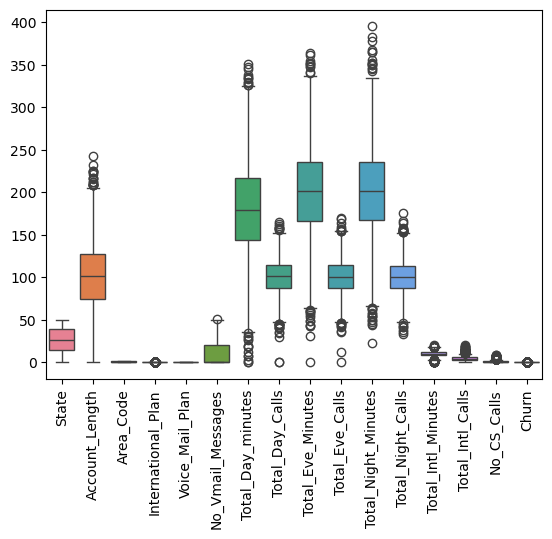

In [713]:
# Box plots to check for outliers
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.show()

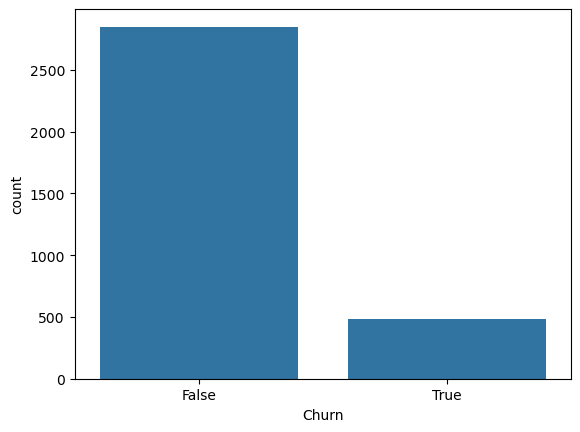

In [639]:
# Bar plot for Churn dataset
sns.countplot(data=train, x='Churn')
plt.xticks()
plt.show()

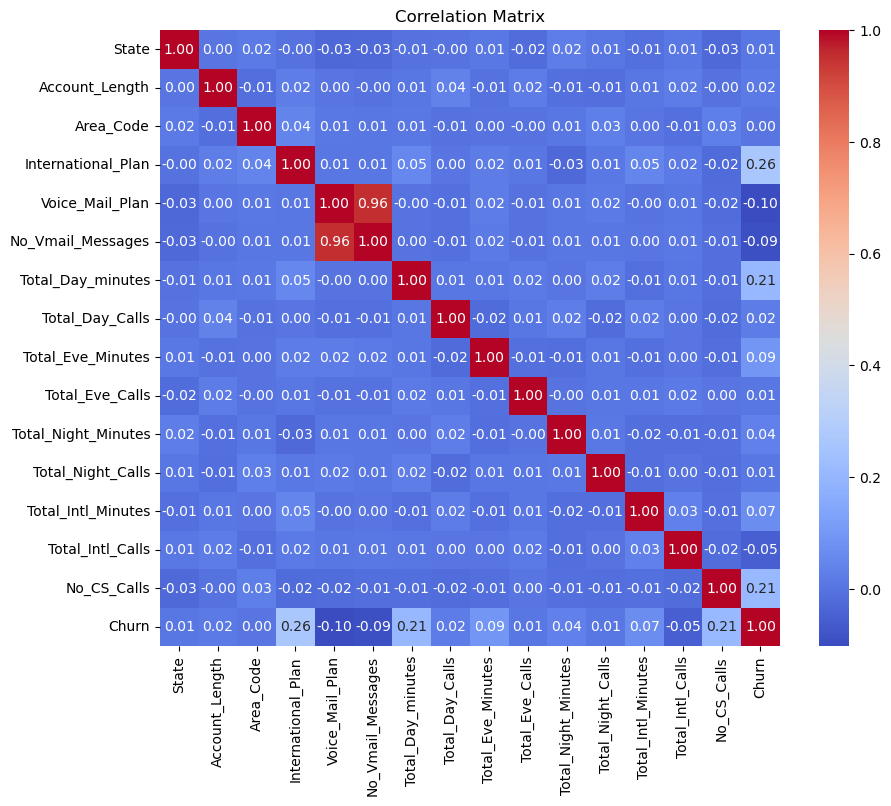

In [640]:
# Correlation Matrix for numerical features
# Mainly used for determaining which is likely to impact churn
plt.figure(figsize=(10, 8))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [641]:
#Performing ML Algorithms

In [642]:
# Standardizing data
scaler=preprocessing.StandardScaler()
x=scaler.fit_transform(x)
x

array([[-6.78649297e-01,  6.76489464e-01, -8.45700361e-04, ...,
        -6.01195090e-01, -4.27932021e-01, -4.11671816e-01],
       [ 6.03169601e-01,  1.49065047e-01, -8.45700361e-04, ...,
        -6.01195090e-01, -4.27932021e-01, -4.11671816e-01],
       [ 3.33312991e-01,  9.02528501e-01, -8.45700361e-04, ...,
         2.11533863e-01, -1.18821850e+00, -4.11671816e-01],
       ...,
       [ 8.73026212e-01, -1.83505538e+00,  1.40851395e+00, ...,
         6.17898340e-01,  3.32354453e-01, -4.11671816e-01],
       [-1.35329082e+00,  2.08295458e+00,  1.40851395e+00, ...,
         2.24335625e+00,  3.32354453e-01, -4.11671816e-01],
       [ 1.07541867e+00, -6.79744752e-01, -8.45700361e-04, ...,
        -1.94830613e-01, -1.18821850e+00, -4.11671816e-01]])

In [643]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

if y.dtype == 'object':
    # Use LabelEncoder to convert categorical target to numeric
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

skfolds = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Implement Gradient Boost Classifier ML algorithm

gb_clf = GradientBoostingClassifier(random_state=42)

for train_index, test_index in skfolds.split(x, y):
    clone_clf = clone(gb_clf)
    x_train_folds = x[train_index]
    y_train_folds = (y[train_index])
    x_test_fold = x[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)
    print(f"Results for Gradient Boost Classifier: {accuracy:.12f}")

Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000
Results for Gradient Boost Classifier: 1.000000000000


In [644]:
# Proven that model has predicted all test samples correctly - 100%
# No misclassifications—every prediction by the model exactly matched the actual labels for the test set.

In [645]:
# Implementing Support Vector Machines (SVM)
from sklearn.svm import SVC
svc_clf = SVC(random_state=42)

for train_index, test_index in skfolds.split(x, y):
    clone_clf = clone(svc_clf)
    x_train_folds = x[train_index]
    y_train_folds = y[train_index]
    x_test_fold = x[test_index]
    y_test_fold = y[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for SVM", n_correct / len(y_pred))


Results for SVM 1.0
Results for SVM 1.0
Results for SVM 0.9970059880239521
Results for SVM 1.0
Results for SVM 1.0
Results for SVM 1.0
Results for SVM 1.0
Results for SVM 1.0
Results for SVM 1.0
Results for SVM 1.0


In [646]:
# Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

for train_index, test_index in skfolds.split(x, y):
    clone_clf = clone(rf_clf)
    x_train_folds = x[train_index]
    y_train_folds = y[train_index]
    x_test_fold = x[test_index]
    y_test_fold = y[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for Random Forest", n_correct / len(y_pred))


Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0
Results for Random Forest 1.0


In [647]:
# Implement K nearest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

for train_index, test_index in skfolds.split(x, y):
    clone_clf = clone(knn_clf)
    x_train_folds = x[train_index]
    y_train_folds = y[train_index]
    x_test_fold = x[test_index]
    y_test_fold = y[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for K nearest neighbor", n_correct / len(y_pred))

Results for K nearest neighbor 1.0
Results for K nearest neighbor 1.0
Results for K nearest neighbor 1.0
Results for K nearest neighbor 1.0
Results for K nearest neighbor 0.996996996996997
Results for K nearest neighbor 0.996996996996997
Results for K nearest neighbor 1.0
Results for K nearest neighbor 0.996996996996997
Results for K nearest neighbor 0.996996996996997
Results for K nearest neighbor 0.993993993993994


In [648]:
# Implement Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

for train_index, test_index in skfolds.split(x, y):
    clone_clf = clone(dt_clf)
    x_train_folds = x[train_index]
    y_train_folds = y[train_index]
    x_test_fold = x[test_index]
    y_test_fold = y[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for Decision Tree", n_correct / len(y_pred))

Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0
Results for Decision Tree 1.0


In [649]:
# Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42)

for train_index, test_index in skfolds.split(x, y):
    clone_clf = clone(log_clf)
    x_train_folds = x[train_index]
    y_train_folds = y[train_index]
    x_test_fold = x[test_index]
    y_test_fold = y[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for Logistic Regression", n_correct / len(y_pred))

Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0
Results for Logistic Regression 1.0


In [650]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

# That means without any machine learning and by just random guessing
# all prediction is normal (which is 0 for normal and 1 for churn) and there is no churn

class NoChurn(BaseEstimator):
    def fit(self, x, y=None):
        pass

    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool) # predicting zeros, i.e. no churn at all

No_Churn = NoChurn()
cross_val_score(No_Churn, x, y, cv=10, scoring="accuracy")


array([0.86526946, 0.85628743, 0.88922156, 0.88288288, 0.87387387,
       0.81681682, 0.87387387, 0.81681682, 0.81681682, 0.85885886])

In [651]:
# Performing Evaluation

In [652]:
# Evaluating the Confusion Matrix

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(gb_clf, x, y, cv=10)

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[2850,    0],
       [   0,  483]], dtype=int64)

In [653]:
# Performing precision for gb_clf classifier
from sklearn.metrics import precision_score, recall_score
print("The Precision score is:",precision_score(y,y_pred))
print("Recall score is:", recall_score(y,y_pred))

The Precision score is: 1.0
Recall score is: 1.0


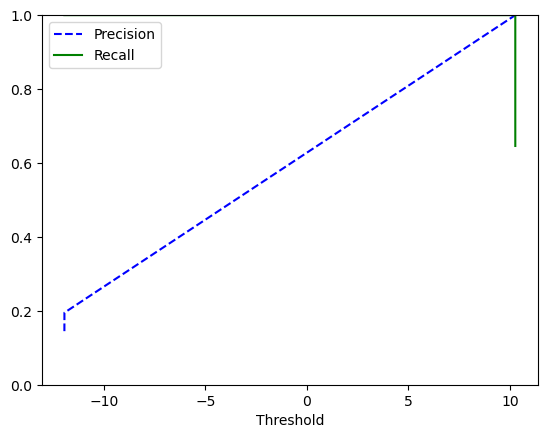

In [654]:
from sklearn.metrics import precision_recall_curve

# Get predicted scores for cross-validation folds
y_scores = cross_val_predict(gb_clf, x, y, cv=10, method="decision_function")
# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

# Plot Precision-Recall vs Threshold curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

# Show the plot
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Text(0, 0.5, 'Precision')

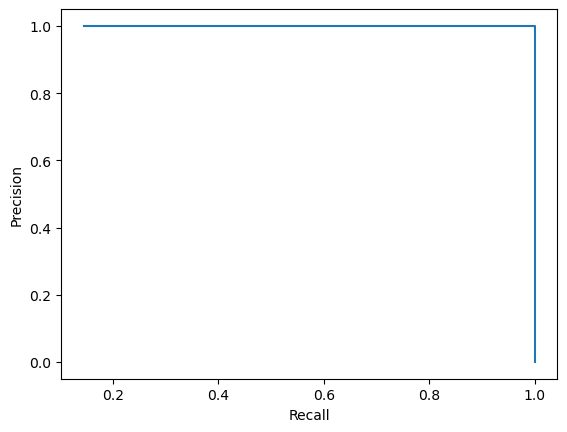

In [655]:
# Using precision against recall
plt.plot(precisions,recalls)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [656]:
y_scores

array([-11.94095179, -11.94095179, -11.94095179, ..., -11.93900071,
       -11.93900071, -11.93900071])

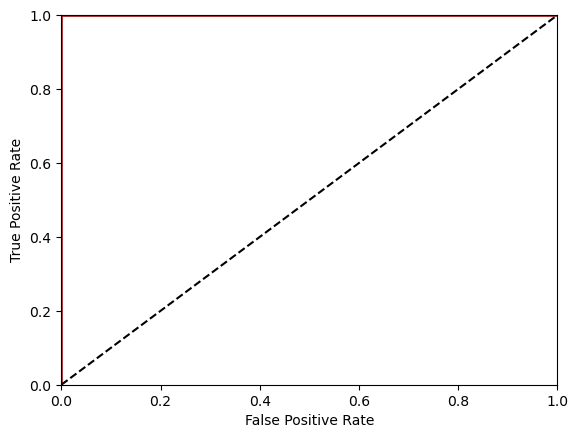

In [657]:
# Performing with Reciever Operating Characteristic 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label,color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()


In [658]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the model and parameters
gb_clf = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearch for best parameters
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit to the data
grid_search.fit(x_train, y_train)

# Output best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train best model
best_gb_clf = grid_search.best_estimator_

# Predictions
y_pred = best_gb_clf.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       101

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



In [659]:
# performing Cross-Validation using K-Fold

In [660]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cross_val_scores = cross_val_score(best_gb_clf, x_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", cross_val_scores.mean())


Cross-validation scores:  [1. 1. 1. 1. 1.]
Mean cross-validation score:  1.0


In [661]:
# performing model comparision
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

# Fit models and print performance
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Model: Gradient Boosting
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       101

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667

Model: Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       101

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667

Model: Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       101

    accuracy                           1.00       667
   macro avg 

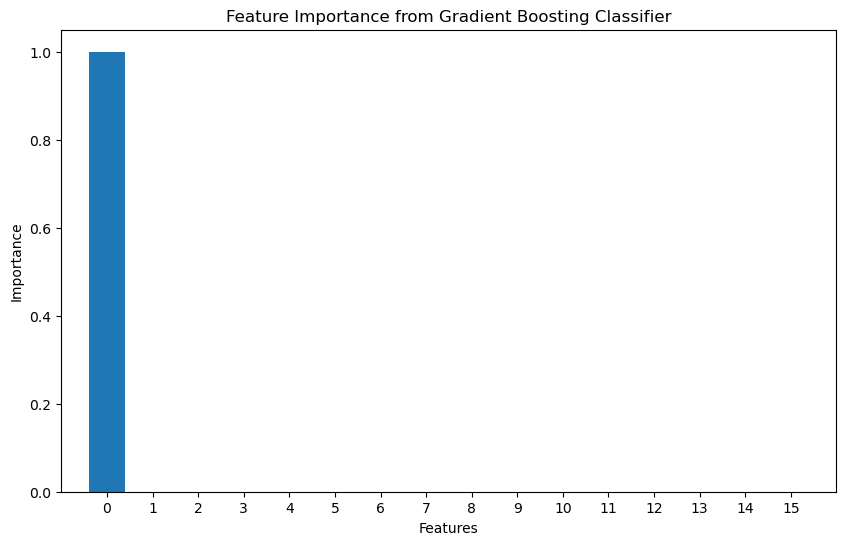

In [662]:
# Performing Model Interpretation

# Fit the Gradient Boosting Classifier
gb_clf.fit(x, y)

# Get feature importances
feature_importances = gb_clf.feature_importances_

# Sort the feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Gradient Boosting Classifier")
plt.bar(range(x.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(x.shape[1]))
plt.xlim([-1, x.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [663]:
# Performing Feature Engineering

# Defining bins for Account_Length
bins = [0, 50, 100, 200, 300]
labels = ['New', 'Short-Term', 'Mid-Term', 'Long-Term']

# Create a new 'tenure_group' column by binning the 'Account_Length' column
train['tenure_group'] = pd.cut(train['Account_Length'], bins=bins, labels=labels, right=False)
test['tenure_group'] = pd.cut(test['Account_Length'], bins=bins, labels=labels, right=False)

# Check the new tenure group feature
print(train[['Account_Length', 'tenure_group']].head())
print(test[['Account_Length', 'tenure_group']].head())

   Account_Length tenure_group
0             128     Mid-Term
1             107     Mid-Term
2             137     Mid-Term
3              84   Short-Term
4              75   Short-Term
   Account_Length tenure_group
0           101.0     Mid-Term
1           137.0     Mid-Term
2           103.0     Mid-Term
3            99.0   Short-Term
4           108.0     Mid-Term
